# Queueing theory - D/D/1 example

This notebook provides an example how to set up a queueing simulation. Input that needs to be specified are:
* 'Lambda': the number of arrivals per hour 
* 'Mu': the number of departures (services completed) per hour
* 'c': the number of servers in the system

To further characterise the queueing behaviour in the system the user has to specify the probability distributions that characterise the interarrival and service times. This notebook describes a D/D/1 queue (according to the Kendall notation for queueing systems) where both the interarrival times and the service times are assumed to be deterministic (or known).  

Currently implemented distributions are:
Currently implemented distributions are:
* 'M': Exponential distribution, 
* 'E2': Erlang 2 distribution,
* 'D': Deterministic lists with known input

NB: the calculation becomes more accurate when a larger number of arrivals (nr_arr) is simulated. Obviously there is a tradeoff between accuracy and calculation time.

### 1. Imports

In [3]:
import openqtsim

import pandas as pd
import xlrd

### 2. Prepare inputs

#### Read IAT and ST table from Excel

In [4]:
df = pd.read_excel('OpenQTSim - D D 1 example.xlsx', index_col=None, header=0, sheet_name='data')
df.head(5)

,name,IAT,ST,AT,maxwait,unloading,loading,length
0,Yellowstar,48,72,48,24,48,24,80
1,United,0,120,48,48,24,96,80
2,Oil Trade,72,48,120,24,48,0,100
3,Yellowstar,96,72,216,24,48,24,80
4,Fruit Trade,0,144,216,0,72,72,90


#### Define the queue object input

In [5]:
A = openqtsim.ArrivalProcess("D", df[["name","IAT","AT"]])
S = openqtsim.ServiceProcess("D", df[["name","ST"]])
c = 1

#### Create the queue object and use it to create a simulating object

In [6]:
# todo: enable deterministic analyses by adding a list of 'customer_name#', 'interarrival#' and 'servicetime#'
q = openqtsim.Queue(A, S, c)
q.kendall_notation

'D/D/1/inf/inf/FIFO'

### 3. Run the simulation

In [7]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
print('')

sim = openqtsim.Simulation(q)
sim.run(len(df["IAT"])-1) # nr is the number of customers that will arrive at the server

Start simulation of "D/D/1/inf/inf/FIFO" queue

Wall time: 163 ms


In [8]:
sim.get_stats()

Waiting time over service time: 6.5736

Rho_system: system utilisation: 0.9847
Rho_server: server utilisation: 0.9847
P_0: probability nobody in the system: 0.0153

L_s: average nr of customers in the system: 7.491803278688525
L_q: average nr of customers in the queue: 6.60655737704918
W_s: the long term average time spent in the system: 781.6000
W_q: the long term average time spent in the queue: 678.4000

IAT: average inter arrival time: 69.5172
ST: average service time: 103.2000



#### Plot IAT and ST

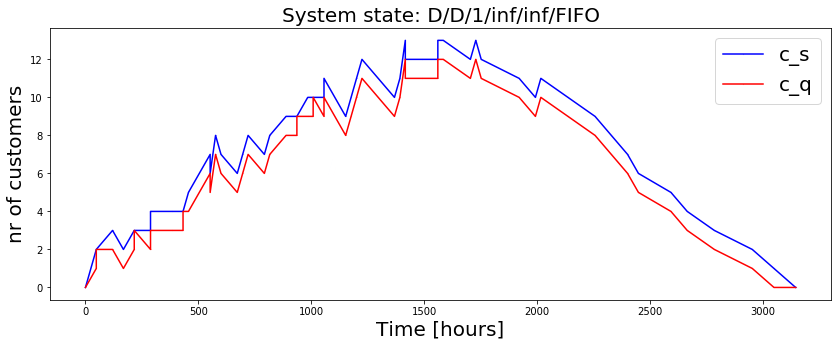

In [9]:
sim.plot_system_state()

In [10]:
df, df_sys = sim.return_log()

In [11]:
df.head(10)

# Meaning of the columns:
# c_id: customer id
# IAT: interarrival time 
# ST: service time 
# AT: arrival time 
# TSB: time service begins
# TSE: time service ends 
# TCSS: time customer spends in the system
# TCWQ: time customer waits int he queue
# ITS: idle time server
# s_id: id of server assigned to customer

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,s_id
0,1,48,120,48.0,48.0,168.0,120.0,0.0,48.0,1
1,2,0,48,48.0,168.0,216.0,168.0,120.0,0.0,1
2,3,72,72,120.0,216.0,288.0,168.0,96.0,0.0,1
3,4,96,144,216.0,288.0,432.0,216.0,72.0,0.0,1
4,5,0,168,216.0,432.0,600.0,384.0,216.0,0.0,1
5,6,72,72,288.0,600.0,672.0,384.0,312.0,0.0,1
6,7,96,120,384.0,672.0,792.0,408.0,288.0,0.0,1
7,8,48,144,432.0,792.0,936.0,504.0,360.0,0.0,1
8,9,24,72,456.0,936.0,1008.0,552.0,480.0,0.0,1
9,10,96,48,552.0,1008.0,1056.0,504.0,456.0,0.0,1


In [12]:
df_sys.head(10)

# Meaning of the columns:
# t: time of logging (if 'lambda' and 'mu' are specified as values per hour, the unit of 't' is hours)
# c_s: nr of customers in the system
# c_q nr of customers in the queue

,t,c_s,c_q
0,0.0,0,0
1,48.0,2,1
2,48.0,2,2
4,120.0,3,2
3,168.0,2,1
5,216.0,3,2
6,216.0,3,2
8,216.0,3,3
7,288.0,3,2
10,288.0,4,3


## Sandbox